In [16]:
'''
OLS using stats models
'''



import xarray as xr
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

fileName = './speed_ALL_atl_0_90.nc'


ds = xr.open_dataset(fileName)
print(ds)

#Data  = ds.Data
#Time  = ds.Fracyear

Data  = ds.yearly
Time  = ds.years


<xarray.Dataset>
Dimensions:    (ncl0: 1, ncl1: 1, ncl2: 1, ncl3: 1, ncl5: 38822, ncl6: 38822, ncl7: 54, ncl8: 54, storm: 38822)
Dimensions without coordinates: ncl0, ncl1, ncl2, ncl3, ncl5, ncl6, ncl7, ncl8, storm
Data variables:
    startYear  (ncl0) int32 ...
    endYear    (ncl1) int32 ...
    latS       (ncl2) float32 ...
    latN       (ncl3) float32 ...
    Dates      (storm) datetime64[ns] ...
    Data       (ncl5) float64 ...
    Fracyear   (ncl6) float32 ...
    years      (ncl7) float32 ...
    yearly     (ncl8) float64 ...


In [17]:
# add a constant = 1 
df = pd.DataFrame({'Time':Time, 'Data':Data, 'const':1})
print (df)

      Time       Data  const
0   1966.0  22.182921      1
1   1967.0  18.741550      1
2   1968.0  20.495951      1
3   1969.0  19.610456      1
4   1970.0  20.504193      1
5   1971.0  18.294038      1
6   1972.0  16.259032      1
7   1973.0  22.521386      1
8   1974.0  21.647478      1
9   1975.0  20.929357      1
10  1976.0  21.333065      1
11  1977.0  20.300350      1
12  1978.0  24.534696      1
13  1979.0  21.367272      1
14  1980.0  25.095406      1
15  1981.0  25.180108      1
16  1982.0  22.095299      1
17  1983.0  20.384052      1
18  1984.0  20.854536      1
19  1985.0  23.091236      1
20  1986.0  21.170163      1
21  1987.0  21.506472      1
22  1988.0  24.475902      1
23  1989.0  21.757186      1
24  1990.0  18.165907      1
25  1991.0  27.722928      1
26  1992.0  18.196622      1
27  1993.0  22.980795      1
28  1994.0  19.349438      1
29  1995.0  19.349607      1
30  1996.0  22.212227      1
31  1997.0  19.380930      1
32  1998.0  23.018859      1
33  1999.0  18

In [18]:
reg1 = sm.OLS(endog=df['Data'], exog=df[['const', 'Time']], \
    missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [19]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [20]:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   Data   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.1438
Date:                Tue, 17 Nov 2020   Prob (F-statistic):              0.706
Time:                        15:36:42   Log-Likelihood:                -117.96
No. Observations:                  54   AIC:                             239.9
Df Residuals:                      52   BIC:                             243.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5321     38.121      0.932      0.3

In [12]:
'''
compare with scipy linear regression:
'''
from scipy import stats

Data  = ds.Data
Time  = ds.Fracyear
slope, intercept, r_value, p_value, std_err = stats.linregress(Time.values,Data.values)

print ("r-squared:", r_value**2)
print ("slope:", slope)
print ("p value:", p_value)




r-squared: 0.00010056917747335859
slope: -0.007559487883452101
p value: 0.048164364168877004


(10.0, 30.0)

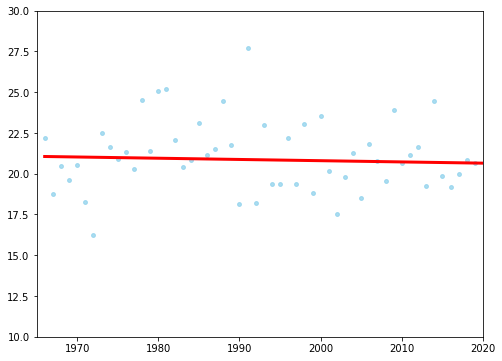

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(1966,2021,1)
get_y = lambda a, b: a + b * x


ymin = 10.
ymax = 30.

y = get_y(intercept,slope)

ax.scatter(Time, Data, s=15, color='skyblue',alpha=.7)
ax.plot(x, y, color='red', linewidth=3, label='OLS')

ax.set_xlim((1965,2020))
ax.set_ylim((ymin,ymax))
